# Udacity Project: Wrangle and Analyze Data

By Wooyoul Na

## Introduction

 - The purpose of this project is to practice what I have learned in Data wrangling section from Udacity Data Analysis Nanodegree program.  
<br>   
 - The dataset which is used for this project is the tweet archive of WeRateDogs.

## I. Gather

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy
import json

In [14]:
pd.set_option('display.max_colwidth', -1)

### 1. twitter archive data: `twitter-archive-enhanced.csv`

In [4]:
### read twitter-archive-enhanced.csv
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
### check whether file-reading is success or not
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None


### 2. image prediction data: `image-predictions.tsv`

In [11]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [12]:
### read image-predictions.tsv
with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)   
image_prediction =  pd.read_csv('image-predictions.tsv', sep='\t')

In [10]:
### check whether file reading is success or not
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. twitter API and JSON: download programmatically from twitter's API

In [13]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [9]:
\consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [10]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [11]:
### check tweet_ids
tweet_ids = tweet_archive.tweet_id.values
len(tweet_ids)
tweet_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149],
      dtype=int64)

In [13]:
tweet_api_list = []
error_list = []
start = timer()
for tweet_id in tweet_ids:
    try: 
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        favourites = tweet._json['favorite_count']
        retweets = tweet._json['retweet_count']
        followers = tweet._json['user']['followers_count']
        friends = tweet._json['user']['friends_count']
        date_time = tweet._json['created_at']
        
        tweet_api_list.append({'tweet_id': tweet_id,
                              'retweets': retweets,
                              'favorites': favourites,
                              'followers': followers,
                              'friends': friends,
                              'date_time': date_time})
    except tweepy.TweepError as e:
        print(str(tweet_id)+": "+str('Fail'))
        error_list.append(tweet_id)
        pass
        
end = timer()
print(end - start)

888202515573088257: Fail
873697596434513921: Fail
872668790621863937: Fail
872261713294495745: Fail
869988702071779329: Fail
866816280283807744: Fail
861769973181624320: Fail
856602993587888130: Fail
851953902622658560: Fail
845459076796616705: Fail
844704788403113984: Fail
842892208864923648: Fail
837366284874571778: Fail
837012587749474308: Fail
829374341691346946: Fail
827228250799742977: Fail
812747805718642688: Fail
802247111496568832: Fail
779123168116150273: Fail
775096608509886464: Fail
771004394259247104: Fail
770743923962707968: Fail
759566828574212096: Fail
754011816964026368: Fail
680055455951884288: Fail
2494.5687215000003


In [14]:
### save tweet API data (tweet_json) to local
tweet_json = pd.DataFrame(tweet_api_list,columns=['tweet_id','date_time','favorites','followers','friends','retweets'])
tweet_json.to_csv('tweet_json.txt',index=False)

In [41]:
### read tweet API data
tweet_json = pd.read_csv('tweet_json.txt')

### check whether file reading is success or not
tweet_json.head()

,tweet_id,date_time,favorites,followers,friends,retweets
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,34760,9012343,18,7288
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,30133,9012343,18,5447
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,22673,9012343,18,3589
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,38018,9012343,18,7473
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,36307,9012343,18,8034


## II. Assess

### 1. Visual assessment

#### 1) `tweet_archive`

In [15]:
tweet_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [17]:
print(tweet_archive.sample(20).text)

462     RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…                      
2339    Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq                                  
844     This is Brudge. He's a Doberdog. Going to be h*ckin massive one day. 11/10 would pat on head approvingly https://t.co/cTlHjEUNK8                                  
2342    Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7                                     
1599    Your fav crew is back and this time they're embracing cannabis culture. 12/10 for all https://t.co/oSvRDuMm1D                                                     
1171    Garden's coming in nice this year. 10/10 https://t.co/5Lra3e4rrw                                                                         

#### 2) `image_prediction`

In [11]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
image_prediction.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
434,674372068062928900,https://pbs.twimg.com/media/CVvZ0KTWwAAdXKV.jpg,1,seashore,0.346126,False,American_alligator,0.106404,False,sandbar,0.049349,False
1187,739485634323156992,https://pbs.twimg.com/media/CkMuP7SWkAAD-2R.jpg,2,Walker_hound,0.640256,True,English_foxhound,0.229799,True,beagle,0.037754,True
537,676948236477857792,https://pbs.twimg.com/media/CWUA1GFW4AAowiq.jpg,1,guenon,0.611603,False,macaque,0.135176,False,squirrel_monkey,0.083247,False
1804,832215726631055365,https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg,1,Afghan_hound,0.274637,True,borzoi,0.142204,True,doormat,0.109677,False
1917,854732716440526848,https://pbs.twimg.com/media/C9ye3b3WAAAlTo0.jpg,1,Pembroke,0.695548,True,Cardigan,0.058902,True,chow,0.028411,True
1563,793601777308463104,https://pbs.twimg.com/media/CwNwmxvXEAEJ54Z.jpg,1,miniature_pinscher,0.538981,True,Chihuahua,0.217830,True,toy_terrier,0.089149,True
983,707411934438625280,https://pbs.twimg.com/media/CdE7ZktXIAEiWLj.jpg,1,Lakeland_terrier,0.738277,True,Airedale,0.028515,True,giant_schnauzer,0.024876,True
195,669583744538451968,https://pbs.twimg.com/media/CUrW3DWXIAAiRqk.jpg,1,candle,0.174315,False,lampshade,0.120407,False,plunger,0.072099,False
1052,714141408463036416,https://pbs.twimg.com/media/Cekj0qwXEAAHcS6.jpg,1,Labrador_retriever,0.586951,True,golden_retriever,0.378812,True,redbone,0.003605,True
1850,840268004936019968,https://pbs.twimg.com/media/C6k7SaEXUAg83_J.jpg,3,Chesapeake_Bay_retriever,0.863987,True,Labrador_retriever,0.052632,True,kelpie,0.032574,True


#### 3) `tweet_json`

In [13]:
tweet_json.head()

,tweet_id,date_time,favorites,followers,friends,retweets
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,34760,9012343,18,7288
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,30133,9012343,18,5447
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,22673,9012343,18,3589
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,38018,9012343,18,7473
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,36307,9012343,18,8034


In [14]:
tweet_json.sample(20)

,tweet_id,date_time,favorites,followers,friends,retweets
167,858107933456039936,Fri Apr 28 23:57:28 +0000 2017,14640,9012343,18,2625
113,870063196459192321,Wed May 31 23:43:25 +0000 2017,33312,9012343,18,7316
1301,706166467411222528,Sat Mar 05 17:16:20 +0000 2016,4911,9012351,18,1514
1042,740699697422163968,Thu Jun 09 00:19:04 +0000 2016,2723,9012346,18,740
1290,706901761596989440,Mon Mar 07 17:58:08 +0000 2016,1943,9012351,18,548
1635,683098815881154561,Sat Jan 02 01:33:43 +0000 2016,2073,9012351,18,618
1658,681891461017812993,Tue Dec 29 17:36:07 +0000 2015,2357,9012351,18,774
1222,711694788429553666,Sun Mar 20 23:23:54 +0000 2016,31238,9012351,18,17293
776,773247561583001600,Tue Sep 06 19:52:39 +0000 2016,9190,9012345,18,3134
847,761745352076779520,Sat Aug 06 02:06:59 +0000 2016,4142,9012345,18,827


### 2. Programmatic assessment

In [15]:
### data info
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
## check the type of timestamp column in tweet_archive dataset
type(tweet_archive.timestamp[0])

str

In [19]:
### check whether invalid values have been contained in the numerator and denominator
tweet_archive[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [22]:
tweet_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [23]:
tweet_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [24]:
len(tweet_archive[tweet_archive['rating_denominator']!=10])

23

In [25]:
### the number of missing values
tweet_archive.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [27]:
tweet_archive.tweet_id.nunique()

2356

In [28]:
tweet_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [29]:
tweet_archive.name.value_counts().head(30)

None       745
a          55 
Charlie    12 
Lucy       11 
Cooper     11 
Oliver     11 
Tucker     10 
Lola       10 
Penny      10 
Winston    9  
Bo         9  
Sadie      8  
the        8  
Toby       7  
Buddy      7  
Daisy      7  
an         7  
Bailey     7  
Rusty      6  
Milo       6  
Koda       6  
Scout      6  
Jack       6  
Stanley    6  
Jax        6  
Dave       6  
Leo        6  
Bella      6  
Oscar      6  
Alfie      5  
Name: name, dtype: int64

In [30]:
print(tweet_archive.doggo.value_counts())
print(tweet_archive.floofer.value_counts())
print(tweet_archive.pupper.value_counts())
print(tweet_archive.puppo.value_counts())

None     2259
doggo    97  
Name: doggo, dtype: int64
None       2346
floofer    10  
Name: floofer, dtype: int64
None      2099
pupper    257 
Name: pupper, dtype: int64
None     2326
puppo    30  
Name: puppo, dtype: int64


In [31]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [33]:
image_prediction.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
cocker_spaniel               30 
malamute                     30 
French_bulldog               26 
Chesapeake_Bay_retriever     23 
miniature_pinscher           23 
seat_belt                    22 
German_shepherd              20 
Staffordshire_bullterrier    20 
Siberian_husky               20 
web_site                     19 
Cardigan                     19 
Maltese_dog                  18 
beagle                       18 
Shetland_sheepdog            18 
Eskimo_dog                   18 
teddy                        18 
Shih-Tzu                     17 
Rottweiler                   17 
Lakeland_terrier             17 
Italian_greyhound            16 
kuvasz                       16 
          

In [34]:
image_prediction.p2.value_counts()

Labrador_retriever                104
golden_retriever                  92 
Cardigan                          73 
Chihuahua                         44 
Pomeranian                        42 
French_bulldog                    41 
Chesapeake_Bay_retriever          41 
toy_poodle                        37 
cocker_spaniel                    34 
Siberian_husky                    33 
miniature_poodle                  33 
beagle                            28 
Pembroke                          27 
Eskimo_dog                        27 
collie                            27 
kuvasz                            26 
Italian_greyhound                 22 
American_Staffordshire_terrier    21 
Pekinese                          21 
toy_terrier                       20 
miniature_pinscher                20 
chow                              20 
Samoyed                           20 
malinois                          20 
Norwegian_elkhound                19 
Boston_bull                       19 
Staffordshir

In [35]:
image_prediction.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
toy_poodle                        29
Pekinese                          29
Pomeranian                        29
Pembroke                          27
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
d

In [36]:
image_prediction.p1_dog.value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

In [37]:
image_prediction.p2_dog.value_counts()

True     1553
False    522 
Name: p2_dog, dtype: int64

In [38]:
image_prediction.p3_dog.value_counts()

True     1499
False    576 
Name: p3_dog, dtype: int64

In [42]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
tweet_id     2331 non-null int64
date_time    2331 non-null object
favorites    2331 non-null int64
followers    2331 non-null int64
friends      2331 non-null int64
retweets     2331 non-null int64
dtypes: int64(5), object(1)
memory usage: 109.3+ KB


In [43]:
tweet_json.isnull().sum()

tweet_id     0
date_time    0
favorites    0
followers    0
friends      0
retweets     0
dtype: int64

In [44]:
tweet_json[['favorites','followers','friends','retweets']].describe()

,favorites,followers,friends,retweets
count,2331.000000,2.331000e+03,2331.0,2331.000000
mean,7259.778207,9.012346e+06,18.0,2564.755899
std,11276.629643,1.614429e+01,0.0,4338.335186
min,0.000000,9.012193e+06,18.0,1.000000
25%,1257.000000,9.012344e+06,18.0,519.500000
50%,3143.000000,9.012346e+06,18.0,1195.000000
75%,8872.000000,9.012351e+06,18.0,2971.000000
max,149310.000000,9.012352e+06,18.0,73547.000000


### Assessing summary
<br> 
#### Quality  
<br>  
 - `tweet_archive` table  
   - Some cases about retweets and replies could be removed.
   - Following columns have missing values: `in_reply_to_status_id`, `in_reply)to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `expanded_urls`. These columns could be removed. 
   - The `floofer` column should be renamed to "floof".
   - The type of `timestamp` column should be changed to datetime. 
   - Because the `source` column is contained extra html tags, so it looks less readable. 
   - the `text` column have some meaningless words, like "\&amp;", "\n", and URL links. To fix the text column more readable, There could be removed.
   - There are some cases which have invalid values in the `rating_numerator` and `rating_denominator`. 
     - **double**: numerator and denominator in the text are double. These cases could be seen as two dogs were rated. Because it viorates the rule, These cases should be removed.
     - **confused**: In some cases, The `text` column could contains not only ratings but also another informations(e.g. month/day), therefore it can lead to some invalid valus of `rating_numerator` and `rating_denominator`. these values could be changed correctly.
     - **not integer** Because some numerators are not integer, some values of `rating_numerator` and `rating_denominator` in real datasets are invalid. these values could be revised correctly.
     - **another cases which denominator is not 10** : Based on Udacity's project overview, denominator is almost always 10, but in real dataset, some cases have denominator which is not 10. These cases indicates that two or more dogs were rated. 
   - There are some erronous information about dog stage. For example, the column `floofer` is made that the value is `floofer` if the `text` contains the word "*floofer*". But, Since the more accurate representation for dog stage is "*floof*", We need to find whether the word "*floof*" is contained in the `text` column.  
<br>   
  
 - `image_prediction` table  
   - `p1`, `p2`, `p3` : Some values are uppercase and lower case.   
<br>    
 - `tweet_json` table  
<br>  

#### Tidiness
 - `tweet_archive`
   - Some columns which related dog stage like `doggo`, `floofer`, `pupper`, `puppo` could be restructured one column.
   - All three tables could be merged into single table.

## Clean

In [106]:
## copy datasets
tweet_archive_clean = tweet_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

### 1. `tweet_archive`: Remove cases which are retweets and replies

#### Define

 - Select cases which are retweets or replies using `retweeted_status_id` and `in_reply_to_status_id`, and remove these cases from `tweet_archive_clean` data.

#### Code

In [107]:
## row-indices of retweets
retweet_ind = tweet_archive_clean[pd.notnull(tweet_archive_clean['retweeted_status_id'])].index

## row-indices of replies
replies_ind = tweet_archive_clean[pd.notnull(tweet_archive_clean['in_reply_to_status_id'])].index

## remove cases which are retweets or replies
tweet_archive_clean.drop(index = retweet_ind, inplace=True)
tweet_archive_clean.drop(index = replies_ind, inplace=True)

#### Test

In [108]:
## the numver of cases after removing retweets and replies
print("The number of rows : "+str(len(tweet_archive_clean)))

## tweet_archive_clean information
tweet_archive_clean.info()

The number of rows : 2097
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float6

### 2. `tweet_archive`: Remove missing values and unnecessary columns

#### Define

 - Find some columns which have any missing values and remove those columns.

#### Code

In [109]:
### Create object which indicates whether the column has missing values or not.
### If the column doesn't have any missing values, missing_col is False.
### If the column has missing values, missing_col is True.

missing_col = tweet_archive_clean.isnull().sum()!=0
missing_col = missing_col[missing_col==False].keys()

In [110]:
### select columns which missing_col is False.
tweet_archive_clean = tweet_archive_clean[missing_col]

#### Test

In [111]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(8)
memory usage: 196.6+ KB


### 3. `tweet_archive` : Rename columns

#### Define

 - The column `floofer` should be renamed `floof` using `rename()` function. 

#### Code

In [112]:
tweet_archive_clean.rename(columns={'floofer':'floof'}, inplace=True)

#### Test

In [113]:
print(tweet_archive_clean.keys())

tweet_archive_clean.head()

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floof', 'pupper', 'puppo'],
      dtype='object')


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floof,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,None,None,None


### 4. `tweet_archive` : Change column's type

#### Define

- Change the type of `timestamp` column to `datetime`.

#### Code

In [114]:
tweet_archive_clean['timestamp'] = pd.to_datetime(tweet_archive_clean.timestamp)

#### Test

In [115]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns, UTC]
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floof                 2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 196.6+ KB


### 5. `image_prediction` : convert `p1`, `p2`, `p3` to lowercase letters

#### Define

 - Because the columns `p1`, `p2`, and `p3` are contained uppercase and lowercase, p1, p2, and p3 will be converted all values to lowercase letters.   

#### Code

In [116]:
image_prediction_clean['p1'] = image_prediction_clean['p1'].str.lower()
image_prediction_clean['p2'] = image_prediction_clean['p2'].str.lower()
image_prediction_clean['p3'] = image_prediction_clean['p3'].str.lower()

#### Test

In [117]:
image_prediction_clean[['p1','p2','p3']].head()

,p1,p2,p3
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound
3,rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,rottweiler,doberman


### 6. `tweet_archive` : Clean `source` coulmn

#### Define

 - Clean and change more readable `source` column to remove html tags. 

#### Code

In [118]:
source_value = list(tweet_archive_clean['source'].unique())

In [119]:
from bs4 import BeautifulSoup
len(tweet_archive_clean['source'])

2097

In [120]:
for ind in tweet_archive_clean.index:
    tweet_archive_clean['source'][ind] = BeautifulSoup(tweet_archive_clean['source'][ind],"lxml").text

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test

In [122]:
tweet_archive_clean['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### 7. `tweet_archive` : Clean text column

#### Define

 - To fix the `text` column more readable, following words will be removed or changed.
    - the word "\n" could be removed.
    - the word "&amp;" could be changed to "&".
    - All URL links could be removed.

#### Code

In [123]:
#### remove html tags and urls like \n, &amp;, and https://~
tweet_archive_clean['text'] = tweet_archive_clean.text.str.replace("\n"," ")
tweet_archive_clean['text'] = tweet_archive_clean.text.str.replace("&amp;","&")
tweet_archive_clean['text'] = tweet_archive_clean.text.str.replace(r"http\S+","")

tweet_archive_clean['text'] = tweet_archive_clean.text.str.strip()

#### Test

In [124]:
tweet_archive_clean.text

0       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10                                                     
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
2       This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10                 
3       This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us                                                           
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek
5       Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek
6       Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking 

### 8. `tweet_archive` : revise some invalid values in rating columns

#### Define

   - Some invalid values in the `rating_numerator` and `rating_denominator` could be revised correctly.
   - Following cases will be removed or revised.
     - **double**: These cases could be seen as two dogs were rated. Because it viorates the rule, *These cases should be removed*.
     - **confused**: *these values could be revised correctly*.
     - **not integer**: *these values could be revised correctly*.
     - **another cases which denominator is not 10** : These cases indicates that two or more dogs were rated. *These cases should be removed*.


#### Code

In [125]:
tweet_archive_clean.reset_index(inplace=True, drop=True)

In [126]:
tab = tweet_archive_clean.text.str.extractall(r"(\d+\d*\/\d+)")

In [127]:
tab_ind = tab.query('match==1').reset_index('match').index

In [128]:
 tweet_archive_clean.iloc[tab_ind,[3,4,5,6]]

### double : should be removed
# 588, 797, 1005, 1136, 1234, 1239, 1278, 1294, 1307, 1556, 1592, 1649, 1653, 1719, 1759, 1811, 1860, 1922,
# 1960, 2005, 2014, 2047
### confused with another information : should be revised
# 853, 948, 985, 1426, 2076

,text,rating_numerator,rating_denominator,name
588,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing",12,10,None
797,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively,10,10,Bookstore
853,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP",9,11,None
948,Happy 4/20 from the squad! 13/10 for all,4,20,None
985,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10,50,50,Bluebert
1005,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 & 8/10 get it together Flurp,10,10,Travis
1136,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10,9,10,Socks
1234,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_)",4,10,None
1239,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random & can't bark for shit. 10/10 & 5/10,10,10,Oliviér
1278,When bae says they can't go out but you see them with someone else that same night. 5/10 & 10/10 for heartbroken pup,5,10,None


In [129]:
### double : should be removed
double_ind = [588, 797, 1005, 1136, 1234, 1239, 1278, 1294, 1307, 1556, 1592, 1649, 1653, 1719, 1759, 1811, 1860, 1922,
 1960, 2005, 2014, 2047] 
### confused with another information : should be revised
confused_ind = [853, 948, 985, 1426, 2076]

In [130]:
## cases which rating_numerator is not integer: should be revised
tweet_archive_clean[tweet_archive_clean['text'].str.contains(r'(\d+\.\d*\/\d+)')].loc[:,['text','rating_numerator','rating_denominator','name']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,text,rating_numerator,rating_denominator,name
41,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",5,10,Bella
528,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",75,10,Logan
586,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,27,10,Sophie
1474,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,26,10,None


In [131]:
## noint_ind : index of rating_numerator is not integer
noint_ind = tweet_archive_clean[tweet_archive_clean['text'].str.contains(r'(\d+\.\d*\/\d+)')].index

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [132]:
tweet_archive_clean.iloc[confused_ind,[3,4,5,6]]
## 853: 14/10
## 948: 13/10
## 985: 11/10
## 1426: 10/10
## 2076: 9/10

,text,rating_numerator,rating_denominator,name
853,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP",9,11,None
948,Happy 4/20 from the squad! 13/10 for all,4,20,None
985,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10,50,50,Bluebert
1426,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10,7,11,Darrel
2076,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10,1,2,an


In [133]:
## case 853
tweet_archive_clean.iloc[853,4] = 14
tweet_archive_clean.iloc[853,5] = 10

## case 948
tweet_archive_clean.iloc[948, 4] = 13
tweet_archive_clean.iloc[948, 5] = 10

## case 985
tweet_archive_clean.iloc[985, 4] = 11
tweet_archive_clean.iloc[985, 5] = 10

## case 1426
tweet_archive_clean.iloc[1426, 4] = 10
tweet_archive_clean.iloc[1426, 5] = 10

## case 2076
tweet_archive_clean.iloc[2076, 4] = 9
tweet_archive_clean.iloc[2076, 5] = 10

In [134]:
tweet_archive_clean.iloc[noint_ind,[3,4,5,6]]
## 41: 13.5/10
## 528: 9.75/10
## 586: 11.27/10
## 1474: 11.26/10

,text,rating_numerator,rating_denominator,name
41,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",5,10,Bella
528,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",75,10,Logan
586,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,27,10,Sophie
1474,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,26,10,None


In [135]:
## case 41
tweet_archive_clean.iloc[41, 4] = 13.5

## case 528
tweet_archive_clean.iloc[528, 4] = 9.75

## case 586
tweet_archive_clean.iloc[586, 4] = 11.27

## case 1474
tweet_archive_clean.iloc[1474, 4] = 11.26

In [136]:
tweet_archive_clean[tweet_archive_clean['rating_denominator']!=10]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floof,pupper,puppo
339,820690176645140481,2017-01-15 17:52:40+00:00,Twitter for iPhone,The floofs have been released I repeat the floofs have been released. 84/70,84.0,70,None,None,None,None,None
403,810984652412424192,2016-12-19 23:06:23+00:00,Twitter for iPhone,Meet Sam. She smiles 24/7 & secretly aspires to be a reindeer. Keep Sam smiling by clicking and sharing this link:,24.0,7,Sam,None,None,None,None
700,758467244762497024,2016-07-28 01:00:57+00:00,Twitter for iPhone,Why does this never happen at my front door... 165/150,165.0,150,None,None,None,None,None
904,731156023742988288,2016-05-13 16:15:54+00:00,Twitter for iPhone,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once,204.0,170,this,None,None,None,None
1011,713900603437621249,2016-03-27 01:29:02+00:00,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody,99.0,90,None,None,None,None,None
1036,710658690886586372,2016-03-18 02:46:49+00:00,Twitter for iPhone,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80,80.0,80,None,None,None,None,None
1056,709198395643068416,2016-03-14 02:04:08+00:00,Twitter for iPhone,"From left to right: Cletus, Jerome, Alejandro, Burp, & Titson None know where camera is. 45/50 would hug all at once",45.0,50,None,None,None,None,None
1129,704054845121142784,2016-02-28 21:25:30+00:00,Twitter for iPhone,Here is a whole flock of puppers. 60/50 I'll take the lot,60.0,50,a,None,None,None,None
1210,697463031882764288,2016-02-10 16:51:59+00:00,Twitter for iPhone,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once,44.0,40,None,None,None,None,None
1399,684222868335505415,2016-01-05 04:00:18+00:00,Twitter for iPhone,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110,121.0,110,None,None,None,None,None


In [137]:
### remove doubles
tweet_archive_clean.drop(index = double_ind, inplace=True)

In [138]:
tweet_archive_clean = tweet_archive_clean.query('rating_denominator==10')

#### Test

In [139]:
## descriptive statistics for ratings
tweet_archive_clean[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2063.000000,2063.0
mean,11.682395,10.0
std,39.952125,0.0
min,0.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,1776.000000,10.0


 - Some cases which value of denominator is not 10 have been removed.

In [140]:
## Check double
tweet_archive_clean.reset_index(inplace=True, drop=True)
tab_test = tweet_archive_clean.text.str.extractall(r"(\d+\d*\/\d+)")
tab_test_ind = tab_test.query('match==1').reset_index('match').index

In [141]:
tweet_archive_clean.iloc[tab_test_ind,[3,4,5,6]]

,text,rating_numerator,rating_denominator,name
848,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP",14.0,10,None
942,Happy 4/20 from the squad! 13/10 for all,13.0,10,None
979,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10,11.0,10,Bluebert
1407,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10,10.0,10,Darrel
2042,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10,9.0,10,an


 - some cases which two dogs were rated have been removed.
 - invalid numerators and denominators which are caused confused informations have been revised correctly.

In [142]:
## Check cases which rating_numerator is not integer
noint_ind_test = tweet_archive_clean[tweet_archive_clean['text'].str.contains(r'(\d+\.\d*\/\d+)')].index
tweet_archive_clean.iloc[noint_ind_test,[3,4,5,6]]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,text,rating_numerator,rating_denominator,name
41,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",13.50,10,Bella
526,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",9.75,10,Logan
584,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,11.27,10,Sophie
1455,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,11.26,10,None


 - invalid numerators and denominators which are caused the fact that `rating_numerator` is not integer have been revised correctly. 

### 9. `tweet_archive` : create `dog_stage` column

#### Define

 - **Quality issue**
   -  Since the more accurate representation for dog stage is "*floof*", We need to find whether the word "*floof*" is contained in the `text` column.  
 - **Tidiness issue** 
   - `doggo`, `floofer`, `pupper`, and `puppo` columns could be restructured one column named `dog_stage`.

#### Code

In [143]:
tweet_archive_clean['dog_stage'] = tweet_archive_clean.text.str.extract('(doggo|floof|pupper|puppo)',expand=True)

In [144]:
tweet_archive_clean.drop(columns = ['doggo','floof','pupper','puppo'],axis=1,inplace=True)

#### Test

In [145]:
tweet_archive_clean.dog_stage.value_counts()

pupper    233
doggo     79 
puppo     29 
floof     22 
Name: dog_stage, dtype: int64

In [146]:
tweet_archive_clean.query('dog_stage=="doggo"')[['text','dog_stage']].head()

,text,dog_stage
9,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate,doggo
39,Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo,doggo
73,I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all,doggo
86,Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo,doggo
94,This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo,doggo


In [147]:
tweet_archive_clean.query('dog_stage=="pupper"')[['text','dog_stage']].head()

,text,dog_stage
28,This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe,pupper
45,This is Gus. He's quite the cheeky pupper. Already perfected the disinterested wink. 12/10 would let steal my girl,pupper
50,This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely,pupper
51,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af (IG: puffie_the_chow),pupper
72,This is Ginger. She's having a ruff Monday. Too many pupper things going on. H*ckin exhausting. 12/10 would snug passionately,pupper


In [148]:
tweet_archive_clean.query('dog_stage=="floof"')[['text','dog_stage']].head()

,text,dog_stage
24,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof,floof
42,Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck,floof
49,This is Rey. He's a Benebop Cumberfloof. 12/10 dangerously pettable,floof
448,This is Doc. He takes time out of every day to worship our plant overlords. 12/10 quite the floofer,floof
468,This is Yogi. He's 98% floof. Snuggable af. 12/10,floof


In [149]:
tweet_archive_clean.query('dog_stage=="puppo"')[['text','dog_stage']].head()

,text,dog_stage
12,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10,puppo
14,This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek,puppo
75,"Meet Venti, a seemingly caffeinated puppoccino. She was just informed the weekend would include walks, pats and scritches. 13/10 much excite",puppo
83,"This is Sebastian. He can't see all the colors of the rainbow, but he can see that this flag makes his human happy. 13/10 #PrideMonth puppo",puppo
92,Say hello to Lassie. She's celebrating #PrideMonth by being a splendid mix of astute and adorable. Proudly supupporting her owner. 13/10,puppo


### 10. Merge datasets

#### Define

 - **Tidiness issue**: Merge `image_prediction` and `tweet_json` with `tweet_archive` table.

#### Code

In [150]:
tweet_archive_master = pd.merge(tweet_archive_clean, image_prediction, how='left',on='tweet_id')
tweet_archive_master = pd.merge(tweet_archive_master, tweet_json, how='left',on='tweet_id')

#### Test

In [151]:
tweet_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2063 entries, 0 to 2062
Data columns (total 24 columns):
tweet_id              2063 non-null int64
timestamp             2063 non-null datetime64[ns, UTC]
source                2063 non-null object
text                  2063 non-null object
rating_numerator      2063 non-null float64
rating_denominator    2063 non-null int64
name                  2063 non-null object
dog_stage             363 non-null object
jpg_url               1937 non-null object
img_num               1937 non-null float64
p1                    1937 non-null object
p1_conf               1937 non-null float64
p1_dog                1937 non-null object
p2                    1937 non-null object
p2_conf               1937 non-null float64
p2_dog                1937 non-null object
p3                    1937 non-null object
p3_conf               1937 non-null float64
p3_dog                1937 non-null object
date_time             2056 non-null object
favorites         

In [152]:
tweet_archive_master.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,date_time,favorites,followers,friends,retweets
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13.0,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,0.085851,False,banana,0.076110,False,Tue Aug 01 16:23:56 +0000 2017,34760.0,9012343.0,18.0,7288.0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,0.090647,True,papillon,0.068957,True,Tue Aug 01 00:17:27 +0000 2017,30133.0,9012343.0,18.0,5447.0
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,0.078253,True,kelpie,0.031379,True,Mon Jul 31 00:18:03 +0000 2017,22673.0,9012343.0,18.0,3589.0
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13.0,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,0.168086,True,spatula,0.040836,False,Sun Jul 30 15:58:51 +0000 2017,38018.0,9012343.0,18.0,7473.0
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,0.225770,True,German_short-haired_pointer,0.175219,True,Sat Jul 29 16:00:24 +0000 2017,36307.0,9012343.0,18.0,8034.0


### Store

In [153]:
tweet_archive_master.to_csv('twitter_archive_master.csv',index=False)

## Analysis

In [154]:
tweet_archive_master.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,date_time,favorites,followers,friends,retweets
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13.0,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,0.085851,False,banana,0.076110,False,Tue Aug 01 16:23:56 +0000 2017,34760.0,9012343.0,18.0,7288.0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,0.090647,True,papillon,0.068957,True,Tue Aug 01 00:17:27 +0000 2017,30133.0,9012343.0,18.0,5447.0
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,0.078253,True,kelpie,0.031379,True,Mon Jul 31 00:18:03 +0000 2017,22673.0,9012343.0,18.0,3589.0
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13.0,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,0.168086,True,spatula,0.040836,False,Sun Jul 30 15:58:51 +0000 2017,38018.0,9012343.0,18.0,7473.0
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,0.225770,True,German_short-haired_pointer,0.175219,True,Sat Jul 29 16:00:24 +0000 2017,36307.0,9012343.0,18.0,8034.0


In [155]:
tweet_archive_master.loc[:,['rating_numerator','rating_denominator','favorites','followers','friends','retweets']].describe().round(3)

,rating_numerator,rating_denominator,favorites,followers,friends,retweets
count,2063.000,2063.0,2056.000,2056.000,2056.0,2056.000
mean,11.682,10.0,8103.568,9012345.796,18.0,2418.174
std,39.952,0.0,11730.645,16.828,0.0,4218.218
min,0.000,10.0,69.000,9012193.000,18.0,11.000
25%,10.000,10.0,1790.500,9012345.000,18.0,534.750
50%,11.000,10.0,3688.000,9012350.000,18.0,1172.000
75%,12.000,10.0,10094.500,9012351.000,18.0,2737.250
max,1776.000,10.0,149310.000,9012352.000,18.0,73547.000


### Insight 1: Analyze relationships among retweets and favorites and time-series change

 - Time series changes for retweets and favorites.

In [156]:
tweet_archive_master['timestamp'] = pd.to_datetime(tweet_archive_master['timestamp'])

In [157]:
### correlation betweet retweets and favorites
tweet_archive_master[['retweets','favorites']].corr()

,retweets,favorites
retweets,1.000000,0.925727
favorites,0.925727,1.000000


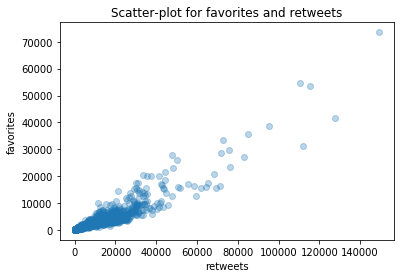

In [158]:
plt.scatter(tweet_archive_master['favorites'],tweet_archive_master['retweets'],alpha=0.3)
plt.xlabel('retweets')
plt.ylabel('favorites')
plt.title('Scatter-plot for favorites and retweets')
plt.show()

In [159]:
retweets_1w = tweet_archive_master.set_index('timestamp')['retweets'].resample('1w').mean()
favorites_1w = tweet_archive_master.set_index('timestamp')['favorites'].resample('1w').mean()

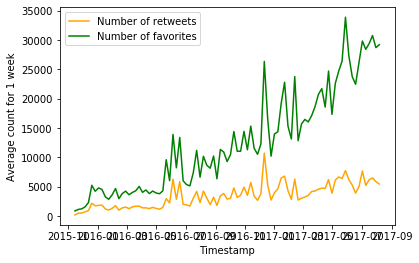

In [160]:
### time-series plots for retweets and favorits
plt.plot(retweets_1w,'orange',label="Number of retweets")
plt.plot(favorites_1w,'green',label='Number of favorites')
plt.xlabel('Timestamp')
plt.ylabel('Average count for 1 week')
plt.legend()

#### summary of Insight 1

 - the correlation coefficient between `retweets` and `favorites` is about 0.926, it means that `retweets` and `favorites` have strongly linear relationship. 
 - Both `retweets` and `favorites` have been increasing over time.

### Insight 2: Differences of rating by dog stage

In [161]:
## calculate rating
tweet_archive_master['rating'] = tweet_archive_master['rating_numerator']/tweet_archive_master['rating_denominator']
descrip_by_dogstage = tweet_archive_master.groupby('dog_stage')['rating'].describe()
descrip_by_dogstage.sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
puppo,29.0,1.213793,0.118696,0.9,1.200,1.2,1.3,1.4
floof,22.0,1.181818,0.073266,1.0,1.125,1.2,1.2,1.3
doggo,79.0,1.163291,0.165000,0.5,1.100,1.2,1.3,1.4
pupper,233.0,1.066206,0.180810,0.3,1.000,1.1,1.2,1.4


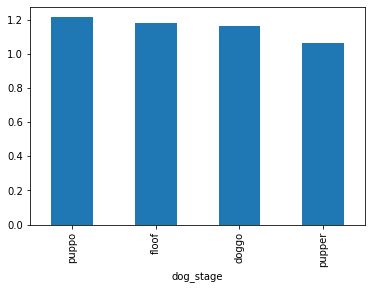

In [162]:
descrip_by_dogstage.sort_values('mean',ascending=False)['mean'].plot(kind='bar')

#### summary of insight 2

 - `puppo` is the highest rating among dog stages, and `pupper` is the lowest rating.

### Insight 3: Create Word cloud using `text`

In [163]:
from wordcloud import WordCloud, STOPWORDS

In [164]:
### make text to list type
text_list = list(tweet_archive_master.text)

In [165]:
text_list

["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10",
 "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",
 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10',
 'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us',
 'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek',
 "Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek",
 'Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below',
 "When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10",
 "This is Zoey. She doesn't 

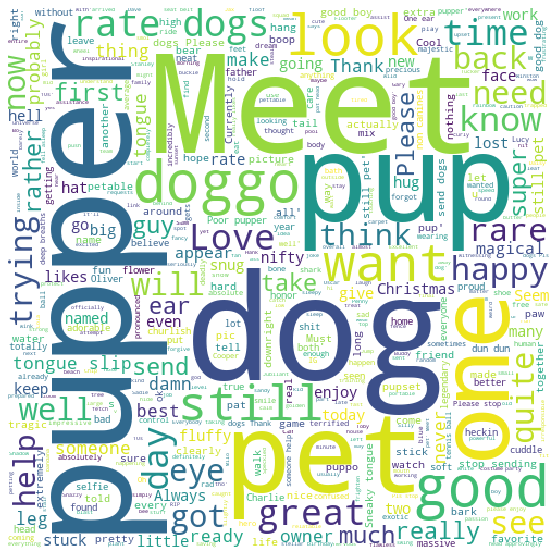

In [166]:
## Setting stopwords
stopwords = set(STOPWORDS)
stopwords.add('10')
stopwords.update(['af','ckin','h',"10'","af'",'ck','vid','tho','Say','hello','lil'])

## create Word cloud: maximum 500 words
wc = WordCloud(width=500,height=500,background_color='white',
               max_words=500,stopwords=stopwords).generate(str(text_list))
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

#### summary of insight 3

 - Some words like "pupper", "dog","pet","Meet',"doggo" et al have been appeared more frequently.